In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [3]:
data=pd.read_csv("bike.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
season,730.0,2.498630,1.110184,1.000000,2.000000,3.000000,3.000000,4.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.995890,2.000339,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.690411,0.462641,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800


### Data Quality Check

In [6]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### There are no missing values in the dataset.

### Checking duplicate values in the dataset

In [7]:
data1=data.copy()
data1.drop_duplicates()
print(data1.shape)

(730, 16)


In [8]:
print(data.shape)

(730, 16)


#### From above we can see that their are no duplicate values in the dataset.

### Data Cleaning

In [9]:
data.iloc[:,1:16]

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [10]:
data.value_counts()

instant  dteday      season  yr  mnth  holiday  weekday  workingday  weathersit  temp       atemp     hum      windspeed  casual  registered  cnt 
1        01-01-2018  1       0   1     0        1        1           2           14.110847  18.18125  80.5833  10.749882  331     654         985     1
480      25-04-2019  2       1   4     0        4        1           1           19.543347  23.51585  42.7917  7.959064   655     5541        6196    1
482      27-04-2019  2       1   4     0        6        0           1           18.757500  22.63185  40.0833  23.291411  1014    5219        6233    1
483      28-04-2019  2       1   4     0        0        0           2           15.443347  18.87520  48.9583  8.708325   1120    3100        4220    1
484      29-04-2019  2       1   4     0        1        1           1           18.791653  22.50605  58.7083  7.832836   2229    4075        6304    1
                                                                                             

### Elimination of Unwanted Columns

In [11]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [12]:
new_data=data[['season','yr','mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','cnt']]
new_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
new_data.shape

(730, 12)

In [14]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [15]:
new_data['season']=new_data['season'].astype('category')
new_data['mnth']=new_data['mnth'].astype('category')
new_data['weekday']=new_data['weekday'].astype('category')
new_data['weathersit']=new_data['weathersit'].astype('category')
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [16]:
new_data=pd.get_dummies(new_data,drop_first=True)
new_data.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,1,0,0,0


In [17]:
print(new_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [18]:
print(new_data.shape)

(730, 30)


### Splitting the Dataset

In [19]:
np.random.seed(0)
train,test=train_test_split(new_data,train_size=0.7,test_size=0.3,random_state=33)
train=pd.DataFrame(train)
test=pd.DataFrame(test)

In [20]:
print( train.info())
print('\n Shape of the train dataset: ',train.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 577 to 391
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null  

In [21]:
print(test.info())
print('\n Shape of the test dataset: ',test.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 607 to 200
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   cnt           219 non-null    int64  
 8   season_2      219 non-null    uint8  
 9   season_3      219 non-null    uint8  
 10  season_4      219 non-null    uint8  
 11  mnth_2        219 non-null    uint8  
 12  mnth_3        219 non-null    uint8  
 13  mnth_4        219 non-null    uint8  
 14  mnth_5        219 non-null    uint8  
 15  mnth_6        219 non-null    uint8  
 16  mnth_7        219 non-null    uint8  
 17  mnth_8        219 non-null    uint8  
 18  mnth_9        219 non-null  

### Exploratory Data Analysis on Train dataset

##### Visualising Categorical variables 

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


<function matplotlib.pyplot.show(close=None, block=None)>

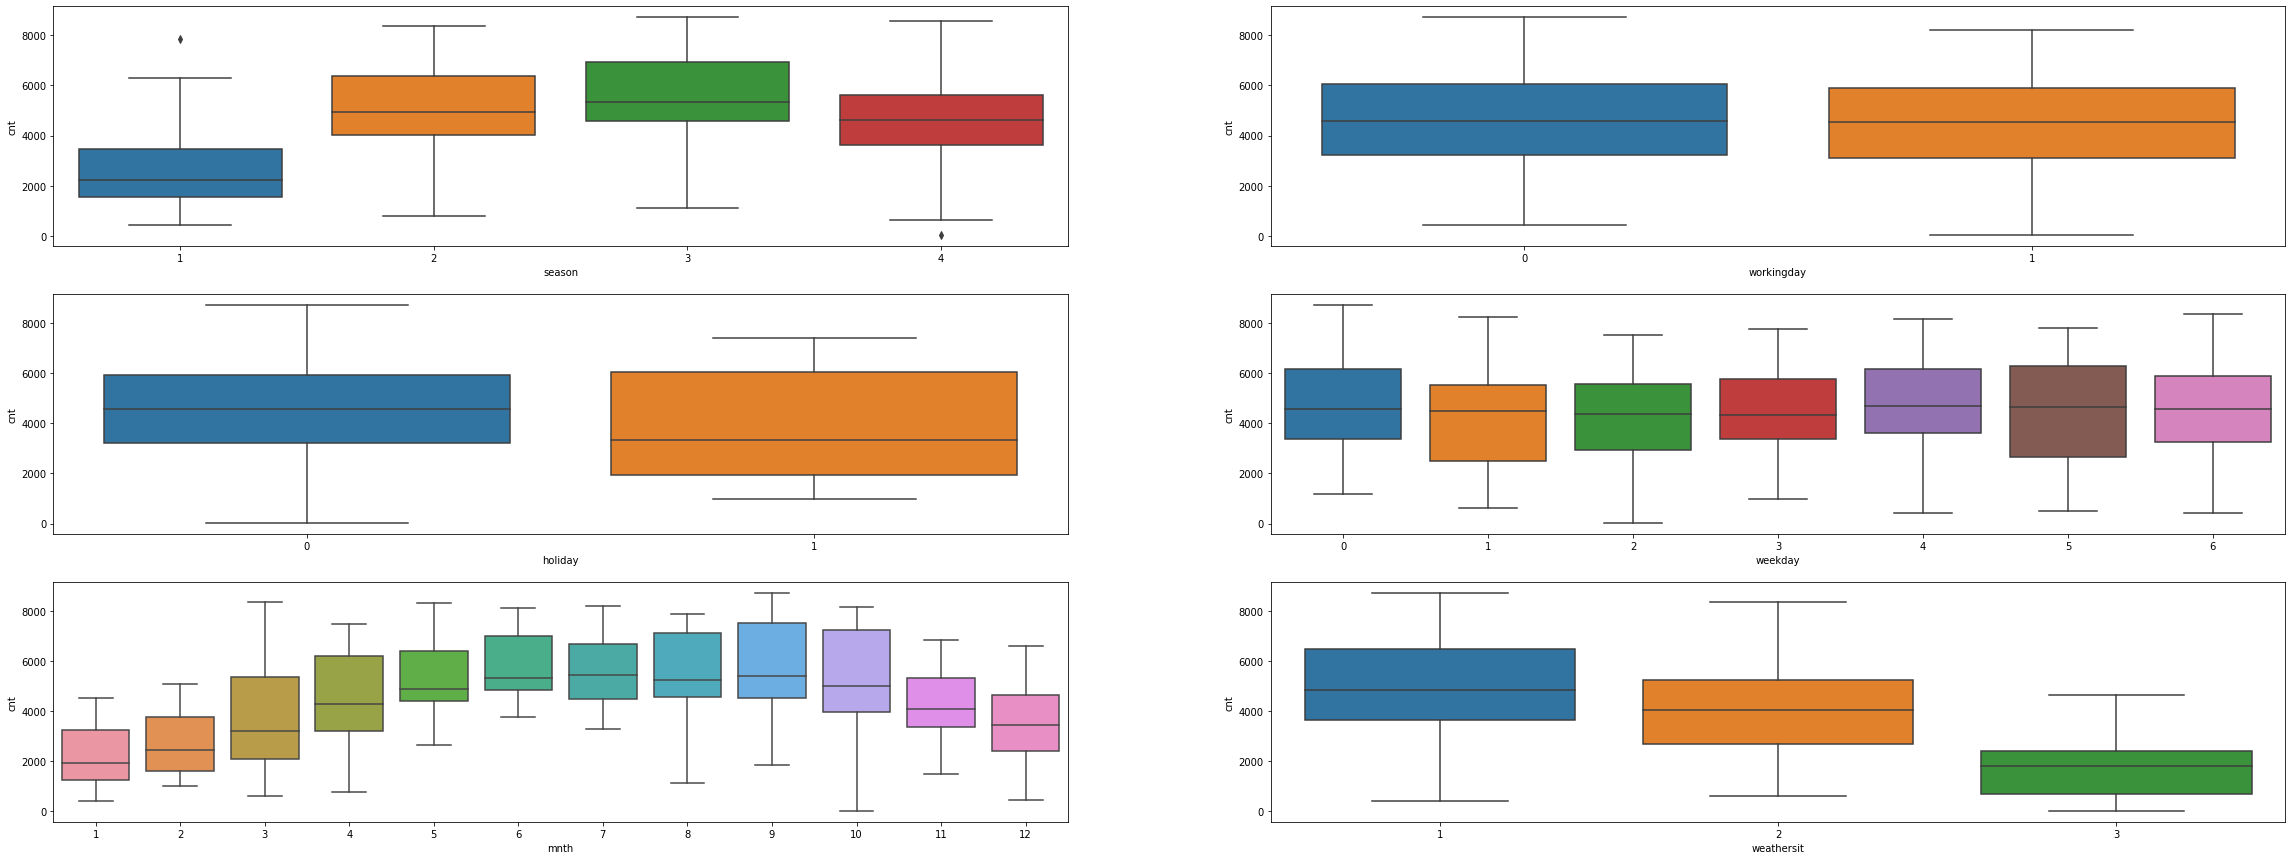

In [23]:
plt.figure(figsize=(40,15))
plt.subplot(3,2,1)
sns.boxplot(x='season',y='cnt',data=data)
plt.subplot(3,2,2)
sns.boxplot(x='workingday',y='cnt',data=data)
plt.subplot(3,2,3)
sns.boxplot(x='holiday',y='cnt',data=data)
plt.subplot(3,2,4)
sns.boxplot(x='weekday',y='cnt',data=data)
plt.subplot(3,2,5)
sns.boxplot(x='mnth',y='cnt',data=data)
plt.subplot(3,2,6)
sns.boxplot(x='weathersit',y='cnt',data=data)
plt.show

#### Insights

There are 6 categorical variables in the dataset.

We used Box plot to study their effect on the dependent variable (‘cnt’) .

The inference that We could derive is:

season: Almost 32% of the bike booking were happening in season3 with a median of over 5000 booking (for the period of 2 years). This was followed by season2 & season4 with 27% & 25% of total booking. This indicates, season can be a good predictor for the dependent variable.

workingday: Almost 69% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking (for the period of 2 years). This indicates, workingday can be a good predictor for the dependent variable.

holiday: Almost 97.6% of the bike booking were happening when it is not a holiday which means this data is clearly biased. This indicates, holiday cannot be a good predictor for the dependent variable.

weekday: weekday variable shows very close trend (between 13.5%-14.8% of total booking on all days of the week) having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. I will let the model decide if this needs to be added or not.

mnth: Almost 10% of the bike booking were happening in the months 5,6,7,8 & 9 with a median of over 4000 booking per month. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable.

weathersit: Almost 67% of the bike booking were happening during ‘weathersit1 with a median of close to 5000 booking (for the period of 2 years). This was followed by weathersit2 with 30% of total booking. This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable.

##### Visualising Numerical variables

In [24]:
train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

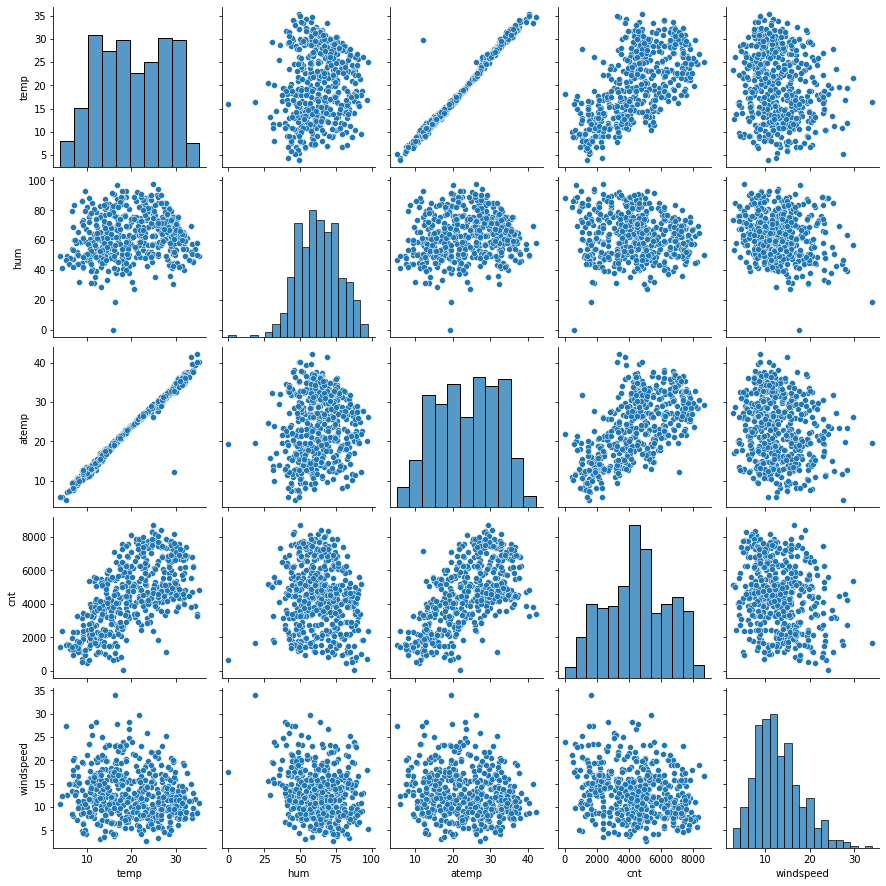

In [25]:
sns.pairplot(train[['temp','hum','atemp','cnt','windspeed']])

#### From the above plot, we can see the linear relationship between the variables 'temp', 'atemp' and 'cnt'.

## Correlation Matrix 

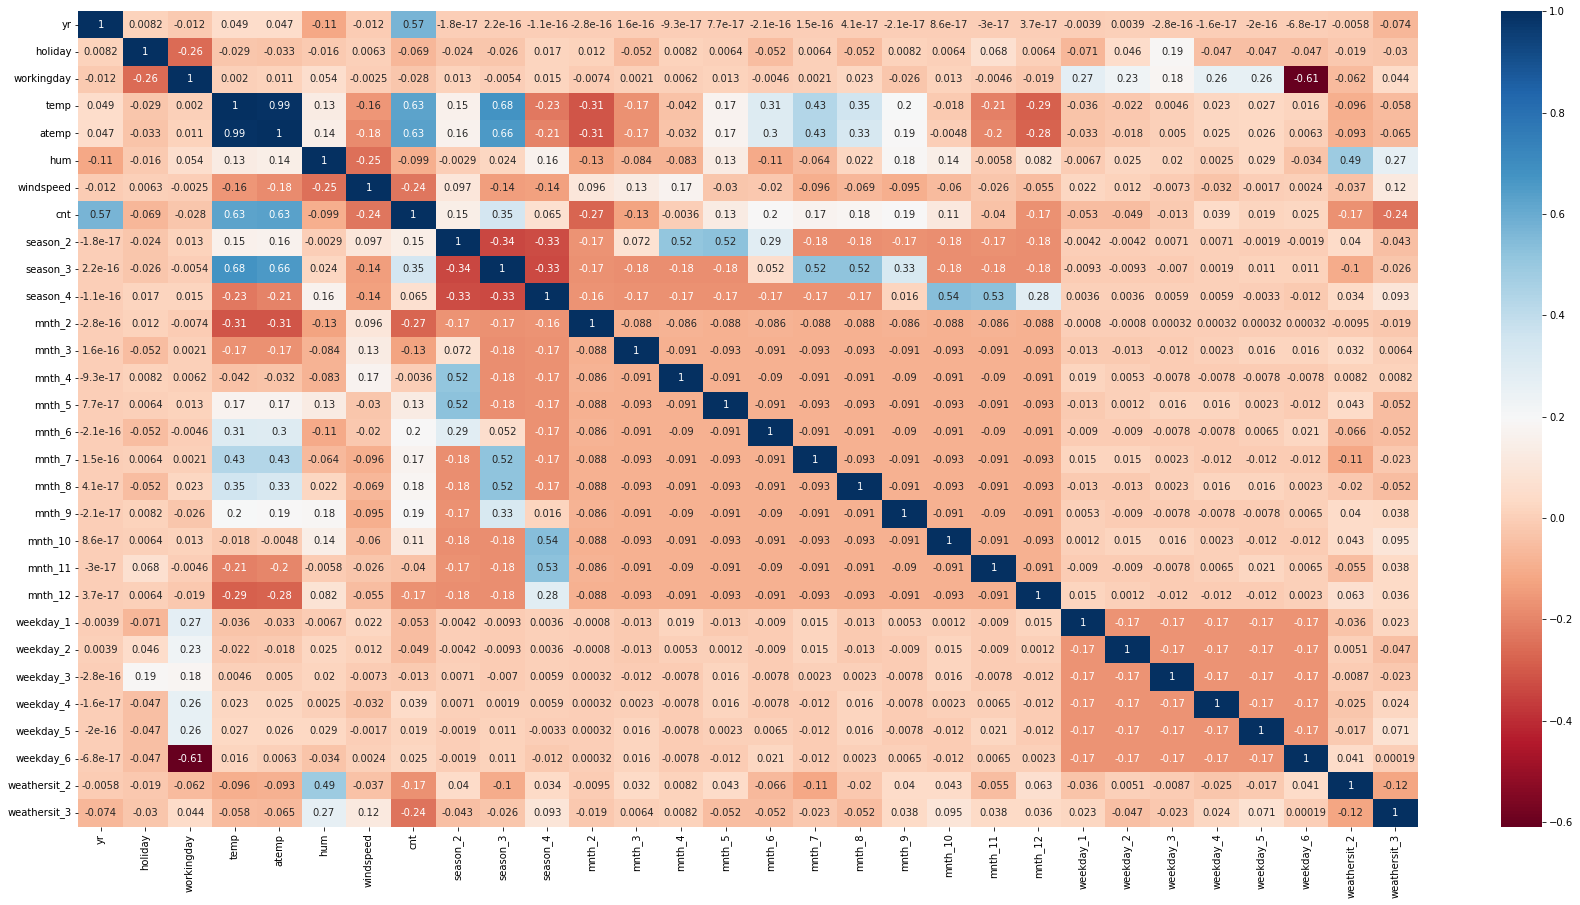

In [26]:
plt.figure(figsize=(30,15))
sns.heatmap(new_data.corr(),annot=True,cmap="RdBu")
plt.show()

#### Heatmap is used to visualize collinearity with the target variable i.e. cnt.

### Rescaling the Features 

In [27]:
scaler=MinMaxScaler()

In [28]:
num=['temp','atemp','cnt','hum','windspeed']
train[num]=scaler.fit_transform(train[num])
train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
577,1,0,1,0.811368,0.765180,0.696658,0.212561,0.869535,0,1,...,0,0,0,0,0,1,0,0,0,0
683,1,0,1,0.293449,0.301437,0.637961,0.237946,0.623907,0,0,...,1,0,0,0,0,0,1,0,1,0
657,1,0,0,0.506068,0.502117,0.589118,0.161736,0.928210,0,0,...,0,0,0,0,0,0,0,0,0,0
306,0,0,0,0.406845,0.411590,0.721936,0.203184,0.454671,0,0,...,1,0,0,0,0,0,0,1,0,0
583,1,0,1,0.835355,0.806186,0.723650,0.160384,0.834215,0,1,...,0,0,0,0,1,0,0,0,1,0


In [29]:
train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.515686,0.021569,0.688235,0.520891,0.503848,0.648024,0.322748,0.514486,0.256863,0.264706,...,0.076471,0.082353,0.141176,0.133333,0.129412,0.133333,0.168627,0.145098,0.350980,0.029412
std,0.500245,0.145413,0.463669,0.240265,0.221489,0.148642,0.165108,0.223389,0.437332,0.441610,...,0.266010,0.275172,0.348545,0.340268,0.335985,0.340268,0.374790,0.352545,0.477745,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.317981,0.320438,0.535240,0.199179,0.364588,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.511520,0.506403,0.643959,0.299454,0.521054,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.731772,0.689181,0.756855,0.417113,0.690462,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Building a Linear Model

In [30]:
train_y=train.pop('cnt')
train_y.head()

577    0.869535
683    0.623907
657    0.928210
306    0.454671
583    0.834215
Name: cnt, dtype: float64

In [31]:
train_x=train
train_x

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
577,1,0,1,0.811368,0.765180,0.696658,0.212561,0,1,0,...,0,0,0,0,0,1,0,0,0,0
683,1,0,1,0.293449,0.301437,0.637961,0.237946,0,0,1,...,1,0,0,0,0,0,1,0,1,0
657,1,0,0,0.506068,0.502117,0.589118,0.161736,0,0,1,...,0,0,0,0,0,0,0,0,0,0
306,0,0,0,0.406845,0.411590,0.721936,0.203184,0,0,1,...,1,0,0,0,0,0,0,1,0,0
583,1,0,1,0.835355,0.806186,0.723650,0.160384,0,1,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0,0,1,0.321987,0.337443,0.699229,0.178313,0,0,0,...,0,0,0,1,0,0,0,0,0,0
201,0,0,0,0.938940,0.980351,0.710797,0.386356,0,1,0,...,0,0,0,0,0,0,0,1,1,0
658,1,0,1,0.479900,0.479914,0.524422,0.266038,0,0,1,...,0,0,1,0,0,0,0,0,0,0
578,1,0,1,0.857163,0.818992,0.678234,0.187140,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [32]:
lm=LinearRegression()
lm.fit(train_x,train_y)

LinearRegression()

In [33]:
rfe=RFE(lm)
rfe=rfe.fit(train_x,train_y)
list(zip(train_x.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 13),
 ('mnth_3', False, 2),
 ('mnth_4', False, 9),
 ('mnth_5', False, 8),
 ('mnth_6', False, 10),
 ('mnth_7', True, 1),
 ('mnth_8', False, 12),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 7),
 ('mnth_12', False, 6),
 ('weekday_1', False, 15),
 ('weekday_2', False, 14),
 ('weekday_3', False, 11),
 ('weekday_4', False, 4),
 ('weekday_5', False, 3),
 ('weekday_6', False, 16),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [34]:
col = train_x.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_7', 'mnth_9', 'mnth_10', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

In [35]:
train_x.columns[~rfe.support_]

Index(['workingday', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_8', 'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

In [36]:
train_x_rfe = train_x[col]

### Building Linear Model using 'STATS MODEL'

##### Model 1

In [37]:
Vif=pd.DataFrame()
Vif['Features']=train_x_rfe.columns
Vif['VIF']=[variance_inflation_factor(train_x_rfe.values,i) for i in range(train_x_rfe.shape[1])]
Vif['VIF']=round(Vif['VIF'],3)
Vif=Vif.sort_values(by="VIF",ascending=False)
Vif

,Features,VIF
3,atemp,321.129
2,temp,320.986
4,hum,15.584
7,season_3,7.351
5,windspeed,3.875
6,season_2,3.504
8,season_4,2.650
12,weathersit_2,2.289
0,yr,1.998
9,mnth_7,1.690


In [38]:
train_x_lm1 = sm.add_constant(train_x_rfe)

lr1 = sm.OLS(train_y, train_x_lm1).fit()

In [39]:
lr1.params

const           0.248703
yr              0.229075
holiday        -0.112214
temp            0.410354
atemp           0.068220
hum            -0.182948
windspeed      -0.127330
season_2        0.115756
season_3        0.080437
season_4        0.141306
mnth_7         -0.067758
mnth_9          0.081456
mnth_10         0.059434
weathersit_2   -0.054898
weathersit_3   -0.249755
dtype: float64

In [40]:
print('\n',lr1.summary())


                             OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     173.8
Date:                Sun, 31 Jul 2022   Prob (F-statistic):          9.40e-181
Time:                        23:53:02   Log-Likelihood:                 494.58
No. Observations:                 510   AIC:                            -959.2
Df Residuals:                     495   BIC:                            -895.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2487      0.028      8.892 

##### Model 2

#### Since, the p-value(0.615) and VIF(321.129)is higher, we eliminate the variable 'atemp'.

In [41]:
train_x_new=train_x_rfe.drop('atemp',axis=1)

In [42]:
Vif=pd.DataFrame()
Vif['Features']=train_x_new.columns
Vif['VIF']=[variance_inflation_factor(train_x_new.values,i) for i in range(train_x_new.shape[1])]
Vif['VIF']=round(Vif['VIF'],3)
Vif=Vif.sort_values(by="VIF",ascending=False)
Vif

,Features,VIF
2,temp,21.241
3,hum,14.706
6,season_3,7.266
4,windspeed,3.847
5,season_2,3.502
7,season_4,2.645
11,weathersit_2,2.280
0,yr,1.997
8,mnth_7,1.675
10,mnth_10,1.619


In [43]:
train_x_lm2=sm.add_constant(train_x_new)
lr2= sm.OLS(train_y, train_x_lm2).fit()

In [44]:
lr2.params

const           0.250531
yr              0.229024
holiday        -0.112526
temp            0.473258
hum            -0.182044
windspeed      -0.129360
season_2        0.115972
season_3        0.079301
season_4        0.141559
mnth_7         -0.066897
mnth_9          0.081748
mnth_10         0.059823
weathersit_2   -0.054979
weathersit_3   -0.250595
dtype: float64

In [45]:
print('\n',lr2.summary())


                             OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     187.5
Date:                Sun, 31 Jul 2022   Prob (F-statistic):          7.64e-182
Time:                        23:53:03   Log-Likelihood:                 494.45
No. Observations:                 510   AIC:                            -960.9
Df Residuals:                     496   BIC:                            -901.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2505      0.028      9.041 

##### Model 3

#### In the 2nd model, VIF value of 'hum' variable is second highest. So we drop the 'hum' variable as 'temp' can be the important factor for business like renting bikes based on the general knowledge.

In [46]:
train_x_new = train_x_new.drop(["hum"], axis = 1)

In [47]:
Vif=pd.DataFrame()
Vif['Features']=train_x_new.columns
Vif['VIF']=[variance_inflation_factor(train_x_new.values,i) for i in range(train_x_new.shape[1])]
Vif['VIF']=round(Vif['VIF'],3)
Vif=Vif.sort_values(by="VIF",ascending=False)
Vif

,Features,VIF
2,temp,14.437
5,season_3,7.038
4,season_2,3.492
3,windspeed,3.369
6,season_4,2.475
0,yr,1.975
7,mnth_7,1.665
9,mnth_10,1.604
10,weathersit_2,1.515
8,mnth_9,1.447


In [48]:
train_x_lm3=sm.add_constant(train_x_new)
lr3=sm.OLS(train_y,train_x_lm3).fit()

In [49]:
lr3.params

const           0.148076
yr              0.234326
holiday        -0.116670
temp            0.438897
windspeed      -0.092026
season_2        0.116358
season_3        0.087202
season_4        0.135718
mnth_7         -0.060677
mnth_9          0.071518
mnth_10         0.058429
weathersit_2   -0.086871
weathersit_3   -0.305043
dtype: float64

In [50]:
print('\n',lr3.summary())


                             OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     193.2
Date:                Sun, 31 Jul 2022   Prob (F-statistic):          2.08e-178
Time:                        23:53:05   Log-Likelihood:                 483.54
No. Observations:                 510   AIC:                            -941.1
Df Residuals:                     497   BIC:                            -886.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1481      0.017      8.610 

##### Model 4

#### Here, we drop the 'season_3' variable based on its very high VIF value.

In [51]:
train_x_new = train_x_new.drop(["season_3"], axis = 1)

In [52]:
Vif=pd.DataFrame()
Vif['Features']=train_x_new.columns
Vif['VIF']=[variance_inflation_factor(train_x_new.values,i) for i in range(train_x_new.shape[1])]
Vif['VIF']=round(Vif['VIF'],3)
Vif=Vif.sort_values(by="VIF",ascending=False)
Vif

,Features,VIF
2,temp,5.103
3,windspeed,3.251
0,yr,1.949
5,season_4,1.854
4,season_2,1.787
6,mnth_7,1.598
8,mnth_10,1.578
9,weathersit_2,1.512
7,mnth_9,1.337
10,weathersit_3,1.119


In [53]:
train_x_lm4=sm.add_constant(train_x_new)
lr4=sm.OLS(train_y,train_x_lm4).fit()

In [54]:
lr4.params

const           0.136963
yr              0.231935
holiday        -0.118662
temp            0.538431
windspeed      -0.096991
season_2        0.073312
season_4        0.110722
mnth_7         -0.046268
mnth_9          0.091750
mnth_10         0.047110
weathersit_2   -0.087014
weathersit_3   -0.300586
dtype: float64

In [55]:
print('\n',lr4.summary())


                             OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     203.4
Date:                Sun, 31 Jul 2022   Prob (F-statistic):          3.19e-176
Time:                        23:53:06   Log-Likelihood:                 475.58
No. Observations:                 510   AIC:                            -927.2
Df Residuals:                     498   BIC:                            -876.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1370      0.017      7.955 

##### Model 5

#### Here, we drop the 'mnth_7" and 'mnth_10' variable as both variables have same highest p-value.

In [56]:
train_x_new = train_x_new.drop(["mnth_10","mnth_7"], axis = 1)

In [57]:
Vif=pd.DataFrame()
Vif['Features']=train_x_new.columns
Vif['VIF']=[variance_inflation_factor(train_x_new.values,i) for i in range(train_x_new.shape[1])]
Vif['VIF']=round(Vif['VIF'],3)
Vif=Vif.sort_values(by="VIF",ascending=False)
Vif

,Features,VIF
2,temp,3.475
3,windspeed,3.182
0,yr,1.943
4,season_2,1.571
7,weathersit_2,1.499
5,season_4,1.322
6,mnth_9,1.212
8,weathersit_3,1.103
1,holiday,1.035


In [58]:
train_x_lm5=sm.add_constant(train_x_new)
lr5=sm.OLS(train_y,train_x_lm5).fit()

In [59]:
lr5.params

const           0.135332
yr              0.233473
holiday        -0.122493
temp            0.521203
windspeed      -0.092599
season_2        0.081646
season_4        0.132152
mnth_9          0.098817
weathersit_2   -0.085026
weathersit_3   -0.295503
dtype: float64

In [60]:
print('\n',lr5.summary())


                             OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     241.8
Date:                Sun, 31 Jul 2022   Prob (F-statistic):          7.76e-176
Time:                        23:53:07   Log-Likelihood:                 469.03
No. Observations:                 510   AIC:                            -918.1
Df Residuals:                     500   BIC:                            -875.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1353      0.017      7.843 

##### Model 6

#### Here, we drop the 'windspeed' variable based on its very high p-value.

In [61]:
train_x_new = train_x_new.drop(["windspeed"], axis = 1)

In [62]:
Vif=pd.DataFrame()
Vif['Features']=train_x_new.columns
Vif['VIF']=[variance_inflation_factor(train_x_new.values,i) for i in range(train_x_new.shape[1])]
Vif['VIF']=round(Vif['VIF'],3)
Vif=Vif.sort_values(by="VIF",ascending=False)
Vif

,Features,VIF
2,temp,2.625
0,yr,1.878
3,season_2,1.533
6,weathersit_2,1.422
4,season_4,1.291
5,mnth_9,1.198
7,weathersit_3,1.041
1,holiday,1.034


In [63]:
train_x_lm6=sm.add_constant(train_x_new)
lr6=sm.OLS(train_y,train_x_lm6).fit()

In [64]:
lr6.params

const           0.098409
yr              0.234148
holiday        -0.121721
temp            0.532648
season_2        0.079801
season_4        0.137042
mnth_9          0.104626
weathersit_2   -0.084700
weathersit_3   -0.311727
dtype: float64

In [65]:
print('\n',lr6.summary())


                             OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     265.1
Date:                Sun, 31 Jul 2022   Prob (F-statistic):          1.24e-174
Time:                        23:53:09   Log-Likelihood:                 463.30
No. Observations:                 510   AIC:                            -908.6
Df Residuals:                     501   BIC:                            -870.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0984      0.013      7.308 

#### The model 6 looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).

#### lr6 Model Coefficient values are:
const       $\quad$    0.098409 <br>
yr          $\quad$     0.234148 <br>
holiday     $\quad$    -0.121721 <br>
temp        $\quad$     0.532648 <br>
season_2    $\quad$     0.079801 <br>
season_4    $\quad$      0.137042 <br>
mnth_9      $\quad$     0.104626 <br>
weathersit_2 $\quad$   -0.084700 <br>
weathersit_3 $\quad$   -0.311727 <br>

##### Ho: B1=B2=...=Bn=0  Vs H1: Not at least one Bi != 0 ; i=1:n

Since, not a single coefficient values is equal to zero, we reject the Null Hypothesis. 


F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

F-statistic: 265.1
Prob (F-statistic): 1.24e-174
The F-Statistics value of 265.1 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant.

### The equation of best fitted surface based on model lr6:
<br>
<br>
cnt = 0.098409 + (yr × 0.234148) - (holiday × 0.121721) + (temp × 0.532648) + (season2 × 0.079801) + (season4 × 0.137042) + (mnth9 × 0.104626) − (weathersit2 × 0.084700) − (weathersit3 × 0.311727)
<br>
<br>

#### Interpretation of Coefficients:
<br>
const: The Constant value of ‘0.098409’ indicated that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike rental can still increase by 0.098409 units.

yr: A coefficient value of ‘0.234148’ indicated that a unit increase in yr variable, increases the bike hire numbers by 0.234148 units.

holiday: A coefficient value of ‘-0.121721’ indicated that, a unit increase in holiday variable decreases the bike hire numbers by 0.121721 units.

temp: A coefficient value of ‘0.532648’ indicated that a unit increase in temp variable, increases the bike hire numbers by 0.532648 units.

season_2: A coefficient value of ‘0.079801’ indicated that w.r.t season_1, a unit increase in season_2 variable increases the bike hire numbers by 0.079801 units.

season_4: A coefficient value of ‘0.137042’ indicated that w.r.t season_1, a unit increase in season_4 variable increases the bike hire numbers by 0.137042 units.

mnth_9: A coefficient value of ‘0.104626’ indicated that w.r.t mnth_1, a unit increase in mnth_9 variable increases the bike hire numbers by 0.104626 units.

weathersit_2: A coefficient value of ‘-0.084700’ indicated that, w.r.t Weathersit_1, a unit increase in Weathersit_2 variable, decreases the bike hire numbers by 0.084700 units.

weathersit_3: A coefficient value of ‘-0.311727’ indicated that, w.r.t Weathersit_1, a unit increase in Weathersit_3 variable, decreases the bike hire numbers by 0.311727 units.